# Winning In the NBA: Golden State Warriors Edition (Part 2) - Exploratory Data Analysis

The NBA is a business, and NBA teams are in the business of winning. Because winning is the ultimate goal for all NBA teams, in this analysis we are going to focus on understanding what metrics impact winning. In the last 10 full seasons, from 2014 to 2023, one team has won four championships in a span of 7 years. Thus, in this analysis, I will focus on how the Golden State Warriors have managed to create an NBA dynasty and what has contributed to their ability to sustain a winning formula over the past decade. 

## Import Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nba_og = pd.read_csv("C:/Users/Joyce/Downloads/nba_teams.csv")

In [3]:
nba_og.head()

,Unnamed: 0,Season,Lg,Tm,W,L,Finish,Age,Ht.,Wt.,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2,2023,NBA,ATL,41,41,2,24.9,6-6,210,...,0.818,920,2719,3639,2049,580,401,1060,1541,9711
1,3,2022,NBA,ATL,43,39,2,26.1,6-6,211,...,0.812,823,2783,3606,2017,587,348,972,1534,9343
2,4,2021,NBA,ATL,41,31,1,25.4,6-6,214,...,0.812,760,2525,3285,1737,503,342,953,1392,8186
3,5,2020,NBA,ATL,20,47,5,24.1,6-6,216,...,0.790,661,2237,2898,1605,523,341,1086,1548,7488
4,6,2019,NBA,ATL,29,53,5,25.1,6-7,215,...,0.752,955,2825,3780,2118,675,419,1397,1932,9294


In [4]:
nba_og.dtypes

Unnamed: 0      int64
Season          int64
Lg             object
Tm             object
W               int64
L               int64
Finish          int64
Age           float64
Ht.            object
Wt.             int64
G               int64
MP              int64
FG              int64
FGA             int64
FG%           float64
3P              int64
3PA             int64
3P%           float64
2P              int64
2PA             int64
2P%           float64
FT              int64
FTA             int64
FT%           float64
ORB             int64
DRB             int64
TRB             int64
AST             int64
STL             int64
BLK             int64
TOV             int64
PF              int64
PTS             int64
dtype: object

If you remember in part 1 of the project, the webscraped dataframe had all the data types of each variable as object. Now after exporting the dataframe as a CSV file, the variables now have their correct data types.

In [5]:
# make copy of original dataframe to edit
nba = nba_og.copy()

## Add New Variables

In [6]:
nba['ASSTOV'] = nba['AST'] / nba['TOV']

In [7]:
nba['TS%'] = nba['PTS'] / (2 * (nba['FGA'] + (0.44 * nba['FTA'])))

In [8]:
nba.columns

Index(['Unnamed: 0', 'Season', 'Lg', 'Tm', 'W', 'L', 'Finish', 'Age', 'Ht.',
       'Wt.', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'ASSTOV', 'TS%'],
      dtype='object')

In [9]:
# drop unnecessary columns (index, ht., wt.)
nba.drop(nba.columns[[0, 8, 9]], inplace = True, axis = 1)

In [10]:
# create boolean to identify Golden State Warriors championship teams
nba['isGSW'] = np.where((nba['Tm'] == 'GSW') & (nba['Season'].isin([2022, 2018, 2017, 2015])), 1, 0)

## Exploring the Data

Before we explore the data let's look at variables of interest and analyze their correlation to winning. 

In [11]:
stats = pd.DataFrame(nba.loc[:,['W', 'Age','FG', 'FG%','3P%', '2P%', 'DRB', 'TRB', 'AST', 'BLK', 'ASSTOV','TS%', 'PTS']])

In [12]:
stats.corr()

,W,Age,FG,FG%,3P%,2P%,DRB,TRB,AST,BLK,ASSTOV,TS%,PTS
W,1.000000,0.545028,0.430679,0.567244,0.548844,0.382284,0.459861,0.358909,0.385476,0.325206,0.382555,0.522542,0.458891
Age,0.545028,1.000000,0.117772,0.332023,0.390817,0.199959,0.186226,0.027471,0.123283,0.090521,0.201202,0.318130,0.148496
FG,0.430679,0.117772,1.000000,0.541223,0.212791,0.456811,0.696561,0.678151,0.770572,0.331379,0.438434,0.416301,0.939876
FG%,0.567244,0.332023,0.541223,1.000000,0.596322,0.805608,0.163441,-0.019603,0.565077,0.156904,0.549364,0.857026,0.518793
3P%,0.548844,0.390817,0.212791,0.596322,1.000000,0.332011,0.093142,-0.088573,0.292247,0.083763,0.405338,0.630470,0.246550
2P%,0.382284,0.199959,0.456811,0.805608,0.332011,1.000000,0.129772,-0.068216,0.528633,0.035244,0.554729,0.915058,0.561078
DRB,0.459861,0.186226,0.696561,0.163441,0.093142,0.129772,1.000000,0.896775,0.490528,0.411367,0.138182,0.125203,0.682958
TRB,0.358909,0.027471,0.678151,-0.019603,-0.088573,-0.068216,0.896775,1.000000,0.393754,0.395706,-0.028059,-0.104202,0.638950
AST,0.385476,0.123283,0.770572,0.565077,0.292247,0.528633,0.490528,0.393754,1.000000,0.284089,0.636905,0.493738,0.728896
BLK,0.325206,0.090521,0.331379,0.156904,0.083763,0.035244,0.411367,0.395706,0.284089,1.000000,0.052118,0.041142,0.284510


<AxesSubplot:>

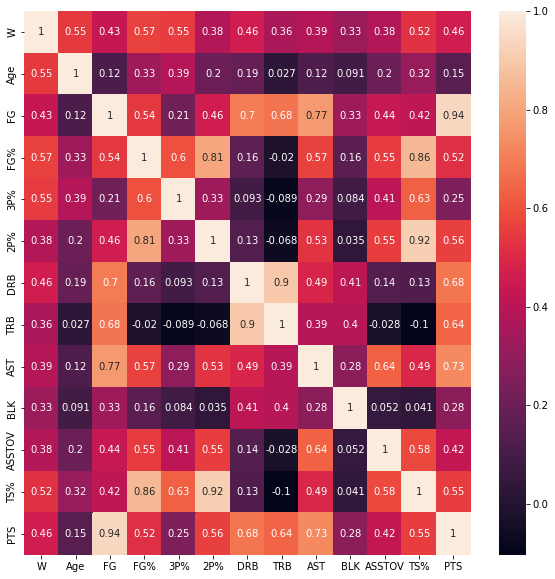

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(
    stats.corr(),
    annot = True 
           )

The column in the correlation matrix that we are most interested in is the win column. We see that certain metrics such as age, true shooting percentage, and 3 point percentage to name a few are the most highly correlated with winning. So we will use this correlation as as a guideline for further inspecting those specific variables which are correlated with winning.

In [14]:
sns.set_palette(['#0173b2', '#ece133', '#d55e00'])

## 3 Point Percentage

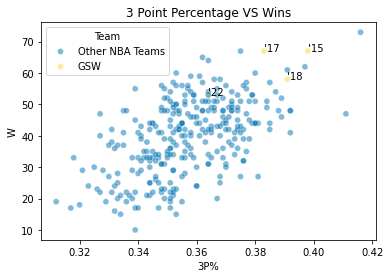

In [15]:
sns.scatterplot(
    data = nba,
    x = '3P%',
    y = 'W',
    hue = 'isGSW',
    alpha = 0.5
)

plt.title("3 Point Percentage VS Wins")
plt.legend(title='Team', loc='upper left', labels=['Other NBA Teams', 'GSW'])
plt.text(x = nba['3P%'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2022)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2022)], s = "'22")
plt.text(x = nba['3P%'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2018)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2018)], s = "'18")
plt.text(x = nba['3P%'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2017)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2017)], s = "'17")
plt.text(x = nba['3P%'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2015)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2015)], s = "'15")
plt.show()

## 3 Pointers Made

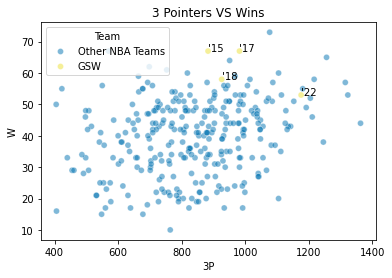

In [16]:
sns.scatterplot(
    data = nba,
    x = '3P',
    y = 'W',
    hue = 'isGSW',
    alpha = 0.5
)

plt.title("3 Pointers VS Wins")
plt.legend(title='Team', loc='upper left', labels=['Other NBA Teams', 'GSW'])
plt.text(x = nba['3P'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2022)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2022)], s = "'22")
plt.text(x = nba['3P'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2018)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2018)], s = "'18")
plt.text(x = nba['3P'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2017)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2017)], s = "'17")
plt.text(x = nba['3P'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2015)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2015)], s = "'15")
plt.show()

## Assists

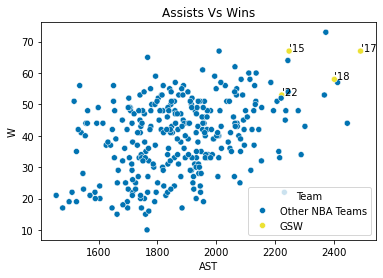

In [29]:
sns.scatterplot(
    data = nba,
    x = 'AST',
    y = 'W',
    hue = 'isGSW',
    alpha = 1
)
plt.title("Assists Vs Wins")
plt.legend(title='Team', loc='lower right', labels=['Other NBA Teams', 'GSW'])
plt.text(x = nba['AST'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2022)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2022)], s = "'22")
plt.text(x = nba['AST'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2018)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2018)], s = "'18")
plt.text(x = nba['AST'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2017)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2017)], s = "'17")
plt.text(x = nba['AST'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2015)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2015)], s = "'15")
plt.show()

## Assist to Turnover Ratio

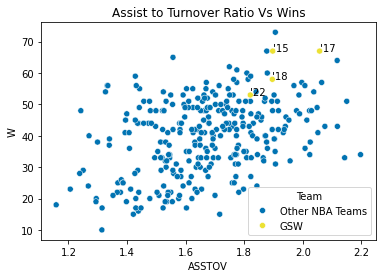

In [18]:
sns.scatterplot(
    data = nba,
    x = 'ASSTOV',
    y = 'W',
    hue = 'isGSW',
    alpha = 1
)
plt.title("Assist to Turnover Ratio Vs Wins")
plt.legend(title='Team', loc='lower right', labels=['Other NBA Teams', 'GSW'])
plt.text(x = nba['ASSTOV'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2022)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2022)], s = "'22")
plt.text(x = nba['ASSTOV'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2018)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2018)], s = "'18")
plt.text(x = nba['ASSTOV'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2017)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2017)], s = "'17")
plt.text(x = nba['ASSTOV'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2015)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2015)], s = "'15")
plt.show()

## Age 

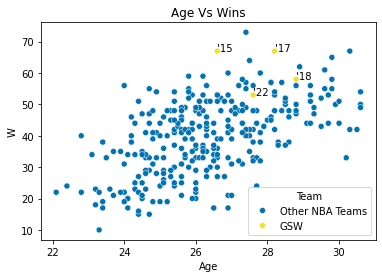

In [30]:
sns.scatterplot(
    data = nba,
    x = 'Age',
    y = 'W',
    hue = 'isGSW',
    alpha = 1
)
plt.title("Age Vs Wins")
plt.legend(title='Team', loc='lower right', labels=['Other NBA Teams', 'GSW'])
plt.text(x = nba['Age'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2022)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2022)], s = "'22")
plt.text(x = nba['Age'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2018)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2018)], s = "'18")
plt.text(x = nba['Age'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2017)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2017)], s = "'17")
plt.text(x = nba['Age'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2015)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2015)], s = "'15")
plt.show()

## Defensive Rebounding and Wins

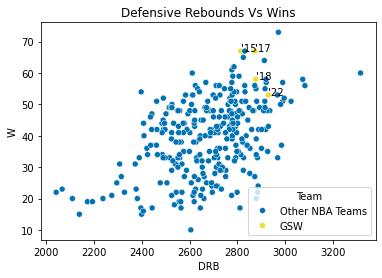

In [26]:
sns.scatterplot(
    data = nba,
    x = 'DRB',
    y = 'W',
    hue = 'isGSW',
    alpha = 1
)
plt.title("Defensive Rebounds Vs Wins")
plt.legend(title='Team', loc='lower right', labels=['Other NBA Teams', 'GSW'])
plt.text(x = nba['DRB'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2022)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2022)], s = "'22")
plt.text(x = nba['DRB'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2018)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2018)], s = "'18")
plt.text(x = nba['DRB'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2017)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2017)], s = "'17")
plt.text(x = nba['DRB'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2015)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2015)], s = "'15")
plt.show()

## Blocks 

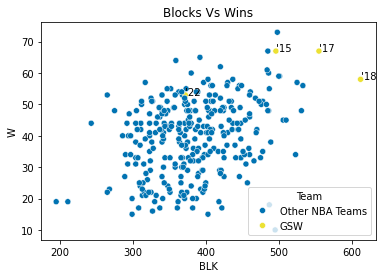

In [25]:
sns.scatterplot(
    data = nba,
    x = 'BLK',
    y = 'W',
    hue = 'isGSW',
    alpha = 1
)
plt.title("Blocks Vs Wins")
plt.legend(title='Team', loc='lower right', labels=['Other NBA Teams', 'GSW'])
plt.text(x = nba['BLK'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2022)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2022)], s = "'22")
plt.text(x = nba['BLK'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2018)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2018)], s = "'18")
plt.text(x = nba['BLK'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2017)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2017)], s = "'17")
plt.text(x = nba['BLK'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2015)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2015)], s = "'15")
plt.show()

## Points

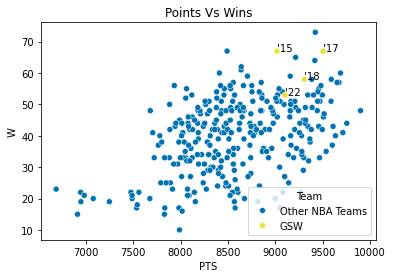

In [31]:
sns.scatterplot(
    data = nba,
    x = 'PTS',
    y = 'W',
    hue = 'isGSW',
    alpha = 1
)
plt.title("Points Vs Wins")
plt.legend(title='Team', loc='lower right', labels=['Other NBA Teams', 'GSW'])
plt.text(x = nba['PTS'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2022)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2022)], s = "'22")
plt.text(x = nba['PTS'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2018)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2018)], s = "'18")
plt.text(x = nba['PTS'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2017)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2017)], s = "'17")
plt.text(x = nba['PTS'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2015)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2015)], s = "'15")
plt.show()

## True Shooting Percentage 

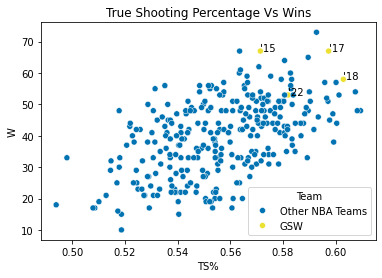

In [32]:
sns.scatterplot(
    data = nba,
    x = 'TS%',
    y = 'W',
    hue = 'isGSW',
    alpha = 1
)
plt.title("True Shooting Percentage Vs Wins")
plt.legend(title='Team', loc='lower right', labels=['Other NBA Teams', 'GSW'])
plt.text(x = nba['TS%'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2022)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2022)], s = "'22")
plt.text(x = nba['TS%'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2018)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2018)], s = "'18")
plt.text(x = nba['TS%'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2017)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2017)], s = "'17")
plt.text(x = nba['TS%'].loc[(nba.Tm == 'GSW') & (nba['Season'] == 2015)], y = nba['W'].loc[(nba.Tm == 'GSW') & (nba.Season == 2015)], s = "'15")
plt.show()

## Trends by Season

In [33]:
df_means = nba[['Season', '3P', '3P%', 'AST', 'TS%', 'ASSTOV','DRB']].groupby('Season').mean()

[Text(0.5, 1.0, 'Average Assist to Turnover Ratio Per Season')]

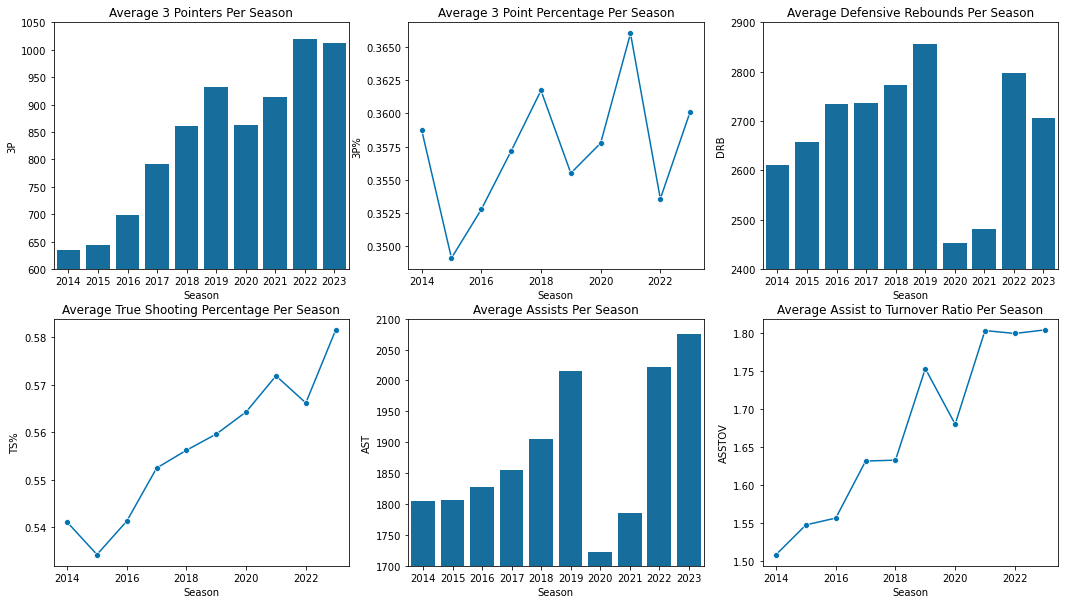

In [34]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (18,10))

sns.barplot(
    x = 'Season',
    y = '3P',
    ax = ax1,
    data = df_means
).set(title = "Average 3 Pointers Per Season")
ax1.set_ylim([600,1050])

sns.lineplot(
    x = 'Season',
    y = '3P%',
    marker = 'o',
    ax = ax2,
    data = df_means
).set(title = "Average 3 Point Percentage Per Season")

sns.barplot(
    x = 'Season',
    y = 'DRB',
    ax = ax3,
    data = df_means
).set(title = "Average Defensive Rebounds Per Season")
ax3.set_ylim([2400,2900])

sns.lineplot(
    x = 'Season',
    y = 'TS%',
    marker = 'o',
    ax = ax4,
    data = df_means
).set(title = "Average True Shooting Percentage Per Season")

sns.barplot(
    x = 'Season',
    y = 'AST',
    ax = ax5,
    data = df_means
).set(title = "Average Assists Per Season")
ax5.set_ylim([1700,2100])

sns.lineplot(
    x = 'Season',
    y = 'ASSTOV',
    marker = 'o',
    ax = ax6,
    data = df_means
).set(title = "Average Assist to Turnover Ratio Per Season")